<a href="https://colab.research.google.com/github/Ragul-K-B/second_hand_car_price_estimator/blob/main/car_price_estimatoripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
car_df=pd.read_csv("used_cars_data.csv")

In [ ]:
from google.colab import files
car_df=files.upload()

Saving used_cars_data.csv to used_cars_data (1).csv


In [ ]:
car_df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
car_df.describe

<bound method NDFrame.describe of       Year  Kilometers_Driven  Owner_Type Engine   Power  Seats  Price
0     2010              72000         1.0    998   58.16    5.0   1.75
1     2015              41000         1.0   1582  126.20    5.0  12.50
2     2011              46000         1.0   1199   88.70    5.0   4.50
3     2012              87000         1.0   1248   88.76    7.0   6.00
4     2013              40670         2.0   1968  140.80    5.0  17.74
...    ...                ...         ...    ...     ...    ...    ...
7248  2011              89411         1.0   1598  103.60    5.0    NaN
7249  2015              59000         1.0   1197  103.60    5.0    NaN
7250  2012              28000         1.0   1461   63.10    5.0    NaN
7251  2013              52262         3.0   1197  103.60    5.0    NaN
7252  2014              72443         1.0   2148  170.00    5.0    NaN

[7253 rows x 7 columns]>

In [ ]:
car_df.dtypes


Year                   int64
Kilometers_Driven      int64
Owner_Type           float64
Engine                object
Power                float64
Seats                float64
Price                float64
dtype: object

In [ ]:
car_df=car_df.drop("Name",axis=1)
car_df=car_df.drop("Location",axis=1)
car_df=car_df.drop("S.No.",axis=1)
car_df=car_df.drop("New_Price",axis=1)
car_df=car_df.drop("Transmission",axis=1)
car_df=car_df.drop("Fuel_Type",axis=1)



KeyError: "['Name'] not found in axis"

In [ ]:
car_df. describe()

In [ ]:
car_df["Owner_Type"]=car_df["Owner_Type"].replace({"First":1.0,"Second":2.0,"Third":3.0,"Fourth & Above":4.0})


In [ ]:
car_df.dtypes


Year                   int64
Kilometers_Driven      int64
Owner_Type           float64
Engine                object
Power                float64
Seats                float64
Price                float64
dtype: object

In [ ]:
car_df["Owner_Type"]=car_df["Owner_Type"].astype("float64")

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
car_df=car_df.drop("Mileage",axis=1)

KeyError: "['Mileage'] not found in axis"

In [ ]:
car_df.head()


,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price
0,2010,72000,1.0,998,58.16,5.0,1.75
1,2015,41000,1.0,1582,126.20,5.0,12.50
2,2011,46000,1.0,1199,88.70,5.0,4.50
3,2012,87000,1.0,1248,88.76,7.0,6.00
4,2013,40670,2.0,1968,140.80,5.0,17.74


In [ ]:
car_df

,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price
0,2010,72000,1.0,620.0,58.0,5.0,1.75
1,2015,41000,1.0,620.0,126.0,5.0,12.50
2,2011,46000,1.0,620.0,88.0,5.0,4.50
3,2012,87000,1.0,620.0,88.0,7.0,6.00
4,2013,40670,2.0,620.0,140.0,5.0,17.74
...,...,...,...,...,...,...,...
7248,2011,89411,1.0,620.0,103.0,5.0,NaN
7249,2015,59000,1.0,620.0,103.0,5.0,NaN
7250,2012,28000,1.0,620.0,63.0,5.0,NaN
7251,2013,52262,3.0,620.0,103.0,5.0,NaN


In [ ]:
car_df.isnull().any()


Year                 False
Kilometers_Driven    False
Owner_Type           False
Engine               False
Power                 True
Seats                 True
Price                 True
dtype: bool

In [ ]:
car_df.dtypes

Year                   int64
Kilometers_Driven      int64
Owner_Type           float64
Engine                object
Power                float64
Seats                float64
Price                float64
dtype: object

In [ ]:

car_df["Power"]=[str(sub).replace("bhp","").strip() for sub in car_df["Power"]]

car_df["Engine"]=[str(sub).replace("CC","").strip() for sub in car_df["Engine"]]





In [ ]:
# Calculate the median of the "Power" column
car_df["Power"] = car_df["Power"].replace("null", np.nan)
power_median = car_df["Power"].median()

# Fill null values in the "Power" column with the median
car_df["Power"] = car_df["Power"].fillna(power_median)

# Convert the "Power" column to float64
car_df["Power"] = car_df["Power"].astype("float64")

# Verify the data type of the "Power" column
print(car_df["Power"].dtype)
car_df["Engine"] = car_df["Engine"].astype("float64")

float64


In [ ]:
car_df.head()


,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price
0,2010,72000,1.0,998,58.16,5.0,1.75
1,2015,41000,1.0,1582,126.20,5.0,12.50
2,2011,46000,1.0,1199,88.70,5.0,4.50
3,2012,87000,1.0,1248,88.76,7.0,6.00
4,2013,40670,2.0,1968,140.80,5.0,17.74


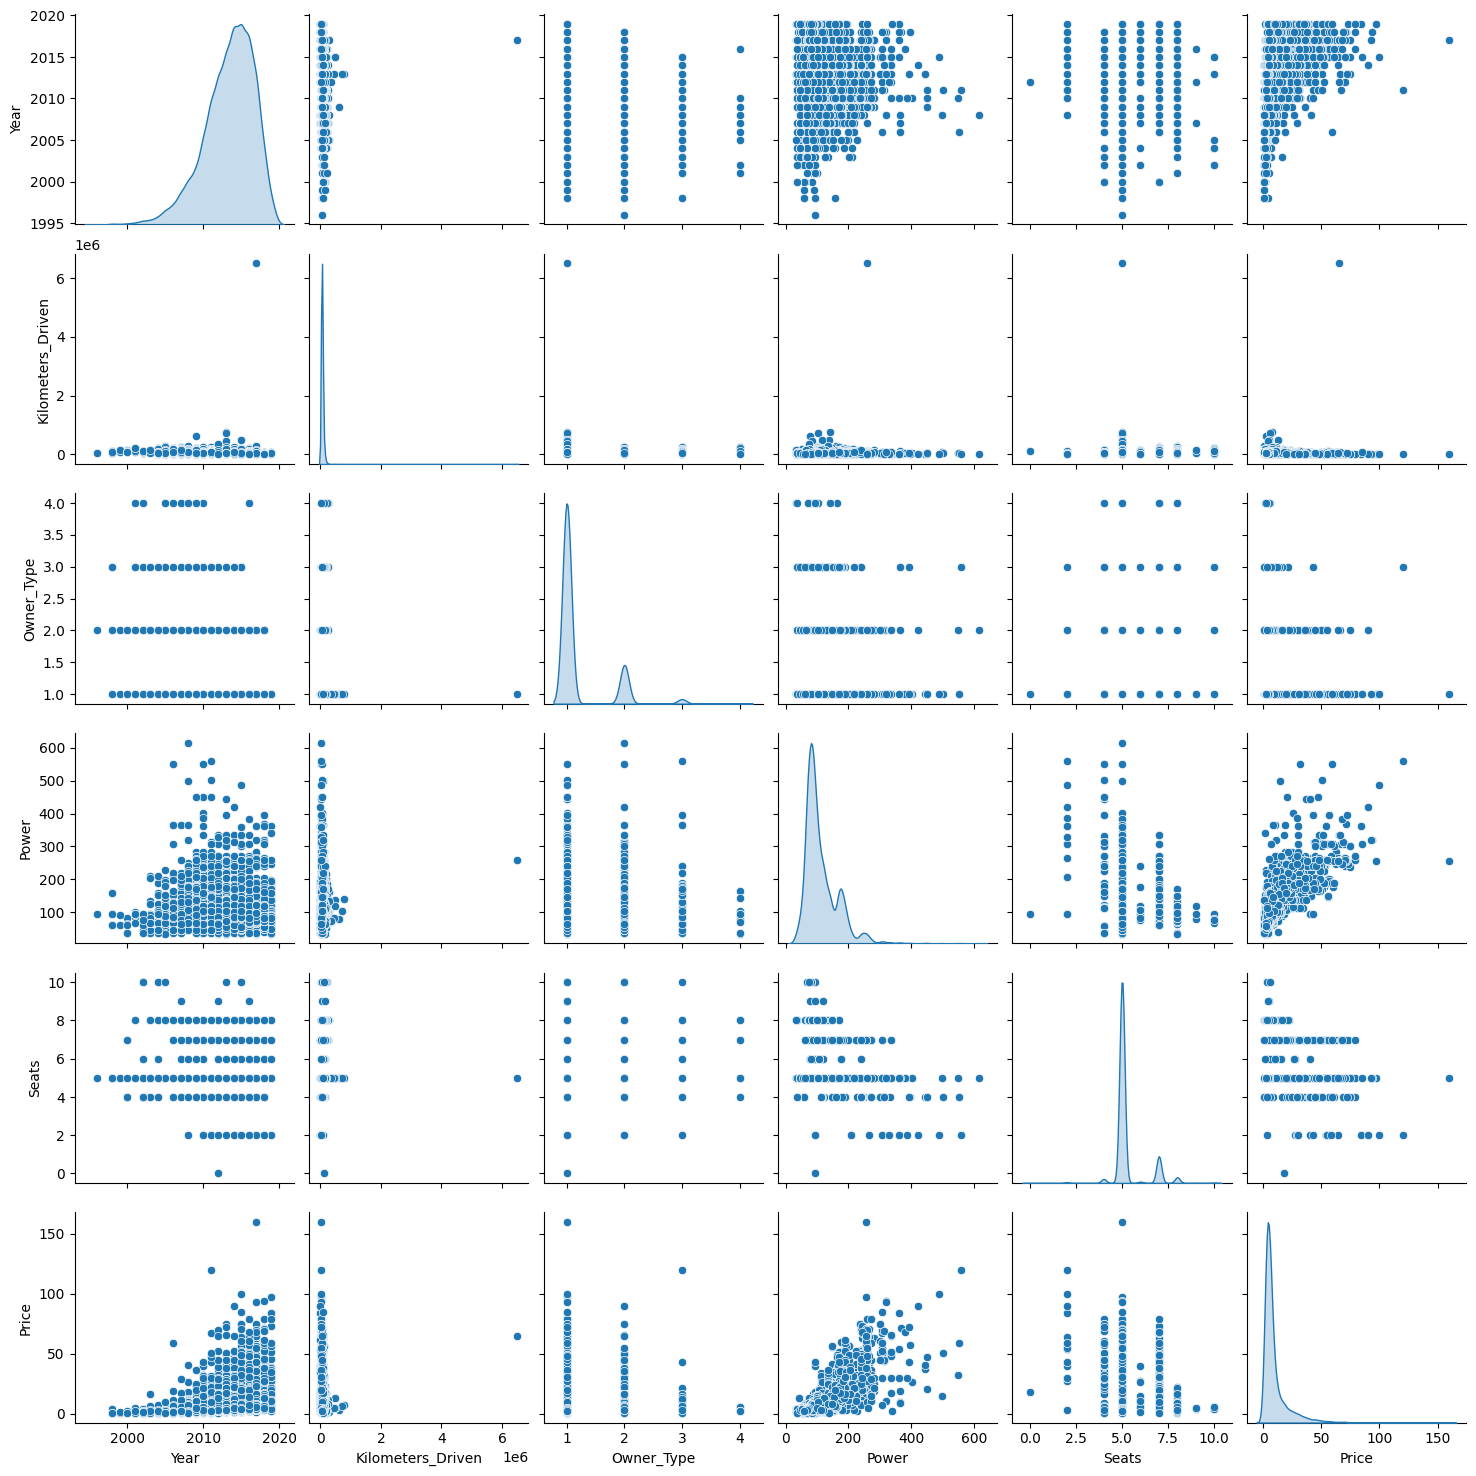

In [ ]:
sns.pairplot(car_df,diag_kind="kde")

In [ ]:
X=car_df.drop('Price',axis=1)
y=car_df[['Price']]

In [ ]:
X['Power']=X['Power'].fillna(X['Power'].median())
X['Seats']=X['Seats'].fillna(X['Seats'].median())
X['Engine']=X['Engine'].fillna(X['Engine'].median())
y['Price']=y['Price'].fillna(y['Price'].median())
X["Engine"] = X["Engine"].astype("float64")
X=X.drop('Enginer',axis=1)

<ipython-input-223-880ba880a20e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Price']=y['Price'].fillna(y['Price'].median())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
#X_train
#X_test['Power']=X['Power'].fillna(X_test['Power'].median())
#X_test['Seats']=X['Seats'].fillna(X_test['Seats'].median())
#y_test['Price']=y['Price'].fillna(y_test['Price'].median())
#X_train.isnull().sum()
X.isnull().sum()
#X_train.dtypes

regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))


0.4408738559119634


In [ ]:
import pandas as pd

# Check for missing values in X_train and X_test
print("Missing values in X_train:\n", X_train.isnull().sum())
print("\nMissing values in X_test:\n", X_test.isnull().sum())

Missing values in X_train:
 Year                 0
Kilometers_Driven    0
Owner_Type           0
Engine               0
Power                0
Seats                0
dtype: int64

Missing values in X_test:
 Year                 0
Kilometers_Driven    0
Owner_Type           0
Engine               0
Power                0
Seats                0
dtype: int64


In [ ]:
ypred=regr.predict(X_test)

In [ ]:
ypred

array([[12.9136137 ],
       [ 7.65656964],
       [ 6.36629927],
       ...,
       [19.41435094],
       [ 3.37226796],
       [ 6.52864718]])

In [ ]:
y_test

,Price
553,6.50
6453,5.64
7245,5.64
3047,2.99
1209,38.00
...,...
4093,5.50
2940,6.50
3506,2.35
6582,5.64


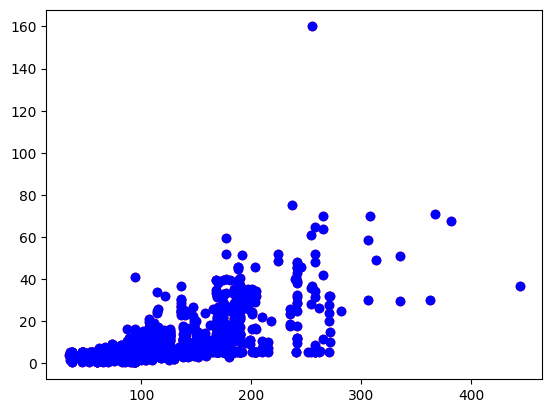

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test['Power'],y_test['Price'],color='r')

plt.scatter(X_test['Power'],y_test['Price'],color='blue')


In [ ]:
X.head()


,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats
0,2010,72000,1.0,998.0,58.16,5.0
1,2015,41000,1.0,1582.0,126.20,5.0
2,2011,46000,1.0,1199.0,88.70,5.0
3,2012,87000,1.0,1248.0,88.76,7.0
4,2013,40670,2.0,1968.0,140.80,5.0


In [ ]:
#execute from here

In [ ]:
ye=int(input("enter year"))
k=float(input("enter kilometer"))

o=k=float(input("owner type"))
e=float(input("enginer"))
p=float(input("power"))
s=float(input("seats"))
X.loc[len(X.index)] = [ye,k,o,e,p,s]


enter year2010
enter kilometer23444
owner type1
enginer1234
power223
seats3


In [ ]:
X.dtypes


Year                 float64
Kilometers_Driven    float64
Owner_Type           float64
Engine               float64
Power                float64
Seats                float64
dtype: object

In [ ]:
X.tail()


y.loc[len(y.index)] = [y['Price'].median()]



<ipython-input-233-8a638976e9ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[len(y.index)] = [y['Price'].median()]


In [ ]:
X.tail()

,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats
7249,2015.0,59000.0,1.0,1197.0,103.6,5.0
7250,2012.0,28000.0,1.0,1461.0,63.1,5.0
7251,2013.0,52262.0,3.0,1197.0,103.6,5.0
7252,2014.0,72443.0,1.0,2148.0,170.0,5.0
7253,2010.0,3.0,3.0,990.0,57.9,3.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
ypred=regr.predict(X_test)





0.49363738263823853


In [ ]:
X.tail()
y.tail()

,Price
7249,5.64
7250,5.64
7251,5.64
7252,5.64
7253,5.64


In [ ]:
print("the predicted value is ",ypred[-1])

the predicted value is  [3.97962606]


In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
!git clone <https://github.com/Ragul-K-B/second_hand_car_price_estimator>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/Ragul-K-B/second_hand_car_price_estimator>'


In [3]:
!cp -r /content/<car_price_estimatoripynb>/* /content/<car_price_estimator.py>/


/bin/bash: line 1: car_price_estimatoripynb: No such file or directory


In [5]:
%cd /content/<%cd /content/<your_repo_folder>



[Errno 2] No such file or directory: '/content/<%cd /content/<your_repo_folder>'
/content
